## Import Required Libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load the Data 
#### Read the csv using Pandas read_csv function

In [84]:
loan = pd.read_csv(r"C:\\Users\\gowth\\OneDrive\\Documents\\UpGrad\Case_Study_Loan\\loan\\loan.csv", low_memory=False)

In [85]:
loan.head()# Checking the size and columns of dataframe 'loan' 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


##### Assumption : The 'addr_state' column has shortforms of states in United States of America, assuming the data is related to the USA and the currency is Dollars($)

### Drop the columns with Nan values

In [86]:
#Create a Drop list to identify all columns with null values

drop_list = loan.isnull().sum()/len(loan.index)

In [87]:
drop_list = drop_list[drop_list == 1]

In [88]:
drop_list.shape

(54,)

In [89]:
loan = loan.drop(columns = drop_list.index)
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### Identify columns with singular value and not significat for the analysis

In [90]:
loan = loan.drop(columns =['member_id','pymnt_plan','url','desc','collections_12_mths_ex_med','policy_code','application_type','initial_list_status'])
#member_id, payment_plan, url are unique values and the purpose is served with column 'id' as primary key
#desc is a descriptive column and cannot be used for analysis at this point
# 'collections_12_mths_ex_med', 'policy_code','application_type','initial_list_status' have the same values for all the rows and have been removed

In [91]:
loan.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,0.00,Jan-15,171.62,NaN,May-16,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,1.11,Apr-13,119.66,NaN,Sep-13,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,0.00,Jun-14,649.91,NaN,May-16,0,0.0,0,0.0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,0.00,Jan-15,357.48,NaN,Apr-16,0,0.0,0,0.0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,0.00,May-16,67.79,Jun-16,May-16,0,0.0,0,0.0,0.0


# Data Clean up

In [92]:
#Strip '%' symbon from column 'int_rate' and return the values as a float type
loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float')

In [93]:
#Strip '%' symbon from column 'revol_util' and return the values as a float type
loan['revol_util'] = loan['revol_util'].str.strip('%').astype('float')

In [94]:
#Extract the numberic value in term and return the values as a int type to a new column 'term_months'
loan['term_months']= loan['term'].str.extract('(\\d+)').astype(int)


### Key aspects to compare:
#### Demographic Data: Compare Home ownership, Verification Status, Employmnet Duration, State, etc.
#### Loan Characteristics: Compare Purpose of Loan, Loan amount, Term, interest rate, installment, etc.
#### Repayment Behavior: Compare Total Payment, Recoveries, Loan_status, Deliquencies, Credit Enquueries, etc.

## Analysis done for understanding the loan dataset
- Histogram of Loan Amount
- Pie chart of Percentage of Loan accounts by Loan status
- Comparision of Pie charts:
  - Percentage of Home Ownership of Deafulters
  - Percentage of Home Ownership of Customers who have fully paid the loan
- Impact of Varification Status on Loan Status
- Default rate by Loan Purpose
- Default rate by State (Geographical imapact) of Applicant
- Heat Maps of Employment Duration of Applicants and the grades of loans
    - Average loan ticket size
    - Concentration of Portfolio : Overall, Fully paid and Deafulted Loans
- Growth of Customers over time
- Growth of Credit book size and average loan amount over time
- Impact of 2008 Financial Crisis on the loans
- Behavioural analysis of the users pre 2008 Crisis and post 20008 Crisis
- Default rate analysis acoss:
    - Interest rate
    - Loan term
    - Loan Amount
    - Credit Age (Difference of Earliest Credit line to approval of the credit line by Lending Club)
    - Credit Enquiries
    - Installment of loan payment
    - Revolving Utilization percentage of approved credit line
    - Public Bankruptcy records
    - Verification Status of Imcome
    - Employment Title (Employer / Job of Applicant)
    - DTI - Debt to Income Ration  

#### Histogram of Loan Amount
- To understand the distribution of loan amount

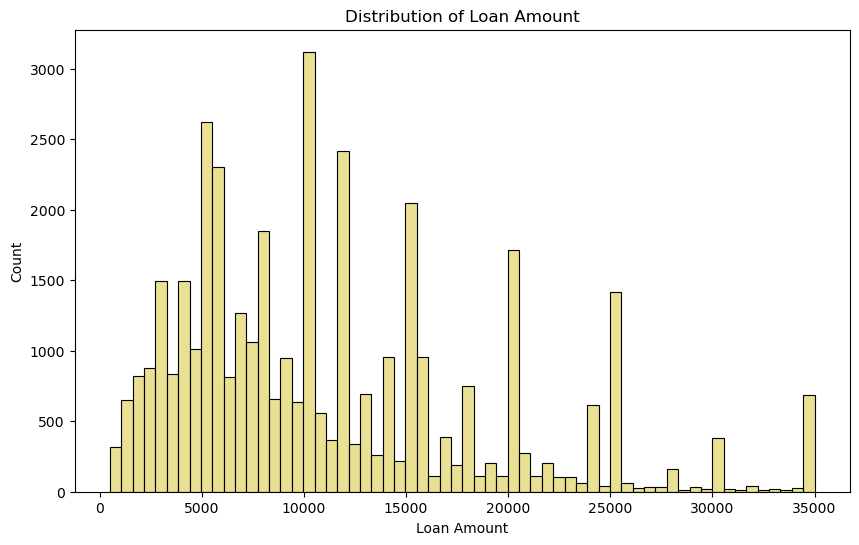

In [95]:
#Plot a histogram of distribution of loan amount 

plt.figure(figsize=(10,6))
sns.histplot(data= loan, x= loan.loan_amnt, element = 'bars', color="#E2D671")

plt.xlabel ('Loan Amount')
plt.ylabel ('Count')
plt.title('Distribution of Loan Amount')
plt.show()

#### Observations: 
- Range of loans:  ' USD 500' to 'USD 35,000'
- The peak of the Histogram is skewed towards left, indicating a mahority of the loans are small ticket loans
- Sudden peaks can be observd at every $5000 interval, suggesting general tendency of customers to apply for a round figure of loan
- Towards the tail end there is a significant increase in loan amount sanctioned 

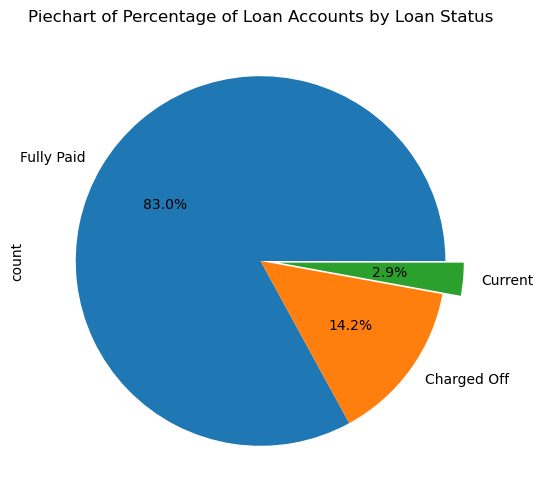

In [96]:
loan["loan_status"].value_counts().plot.pie(autopct='%1.1f%%', figsize =(10,6), explode =(0,0,0.1))
plt.title('Piechart of Percentage of Loan Accounts by Loan Status')
plt.show()


- In the given data set:
    - 83.0% Users have fully paid the loan
    - 14.2% have defaulted
    - 2.9% have currently active line of credit

# Impact of Home ownership on Loan Status 

#### Creating a data frame 'defaulted_loan' with data of loan accounts which are defaulted

In [97]:
defaulted_loan = loan[loan["loan_status"] == "Charged Off"]
#creteing a dataframe by filtering customers who have defaulted their loan accounts

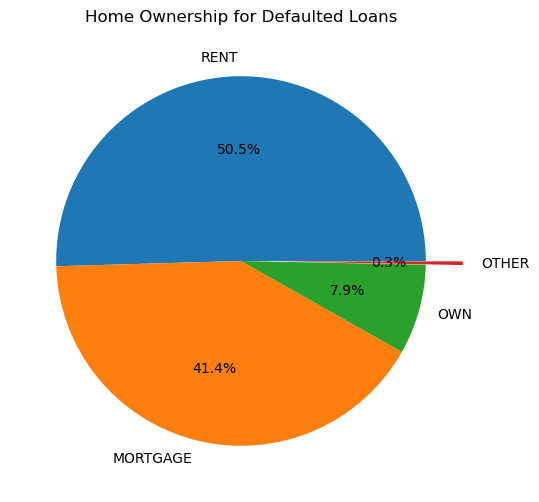

In [98]:
def_ho = defaulted_loan["home_ownership"].value_counts()
#Calculating the value counts by Home Onwership
explode_values = (0, 0, 0, 0.2)

# Plot Pie Chart of the Value Counts

def_ho.plot.pie(autopct='%1.1f%%', 
                figsize=(10, 6), 
                explode=explode_values
               )

# Show the plot
plt.title('Home Ownership for Defaulted Loans')
plt.ylabel('') 
plt.show()

- In the given data set of users who have deafulted their loan accounts, the home ownership is as follows:
    - 50.5% have rented housing
    - 14.2% have mortgaged housing
    - 7.9% have own house
    - 0.3% have other forms of housing ownerships

#### Creating a data frame 'paid_loan' with data of loan accounts which are paid off 

In [99]:
paid_loan = loan[loan["loan_status"] == "Fully Paid"]
#creteing a dataframe by filtering customers who have paid off their loans

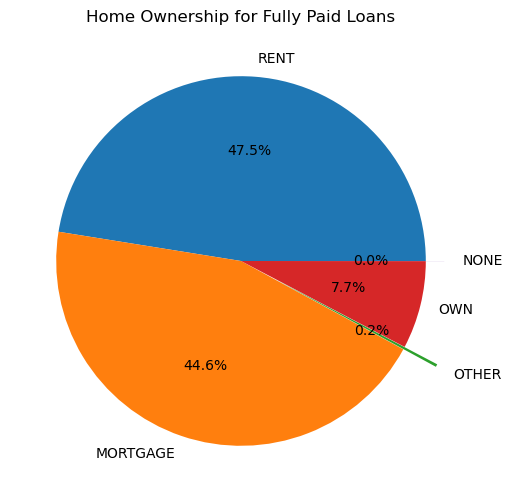

In [100]:
paid_ho = paid_loan["home_ownership"].value_counts()

order = ['RENT','MORTGAGE','OTHER', 'OWN','NONE']
paid_ho = paid_ho.reindex(order).dropna()
#Reindexing for better readability of the chart

#Calculating the value counts by Home Onwership
explode_values = (0, 0, 0.2, 0,0.1)

# Plot Pie Chart of the Value Counts

paid_ho.plot.pie(autopct='%1.1f%%', 
                figsize=(10, 6), 
                explode=explode_values
               )

# Show the plot
plt.title('Home Ownership for Fully Paid Loans')
plt.ylabel('') 
plt.show()

- In the given data set of users who have paid off the loan accounts, the home ownership is as follows:
    - 47.5% have rented housing
    - 44.6% have mortgaged housing
    - 7.7% have own house
    - 0.3% have other forms of housing ownerships

In [101]:


# Create the pivot table
home_ownership = pd.pivot_table(
    data=loan[loan['loan_status']!='Current'], 
    values='id', 
    index='home_ownership', 
    columns='loan_status', 
    aggfunc='count', 
    fill_value=0
)

# Normalize each column to get percentages
ho_percentage = home_ownership.div(home_ownership.sum(axis=0), axis=1) * 100

# Display the percentage pivot table
print(ho_percentage)


loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE          41.354185   44.594841
NONE               0.000000    0.009105
OTHER              0.319886    0.242792
OWN                7.872756    7.684370
RENT              50.453172   47.468892


In [102]:
ho_percentage = ho_percentage.loc[['RENT', 'MORTGAGE', 'OWN']]
ho_percentage

loan_status,Charged Off,Fully Paid
home_ownership,,
RENT,50.453172,47.468892
MORTGAGE,41.354185,44.594841
OWN,7.872756,7.684370


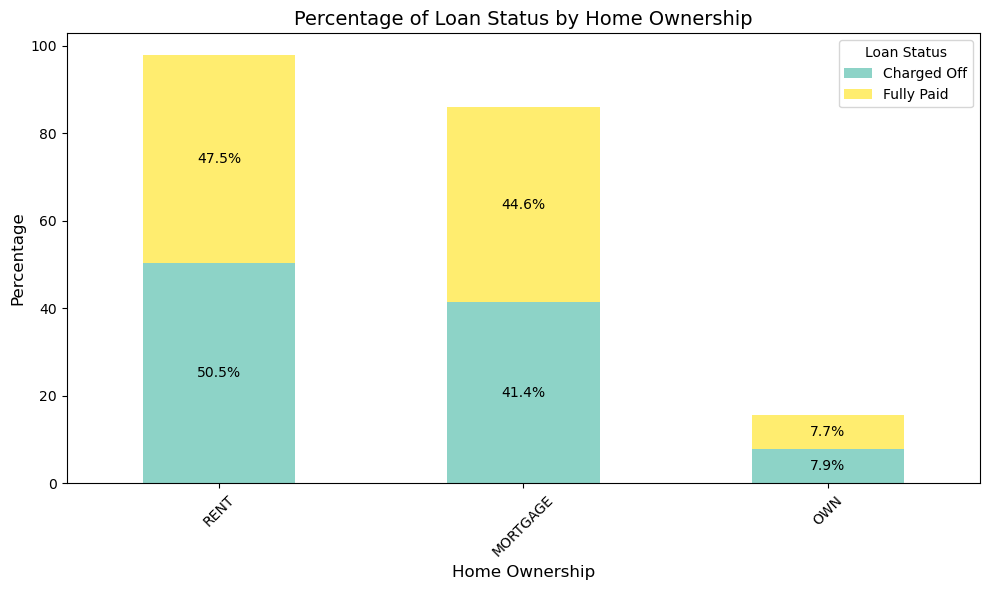

In [103]:
# Plot the stacked bar chart
ax = ho_percentage.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6),
    colormap="Set3"
)

# Annotate the bars with percentage values
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%',label_type='center')

# Add titles and labels
plt.title('Percentage of Loan Status by Home Ownership', fontsize=14)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Home Ownership', fontsize=12)
plt.legend(title='Loan Status', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## Conclusion: 
- On comparision of users who have defaulted and who have paid off there is no significant impact of mode of home ownership
- Users in both the groups have comparable (similar) split of home ownership modes 

# Impact of Verification status on Loan Status

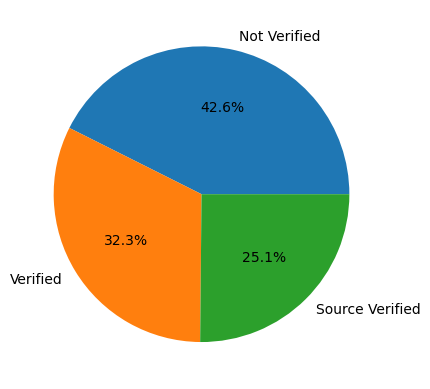

In [104]:
loan["verification_status"].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.show()

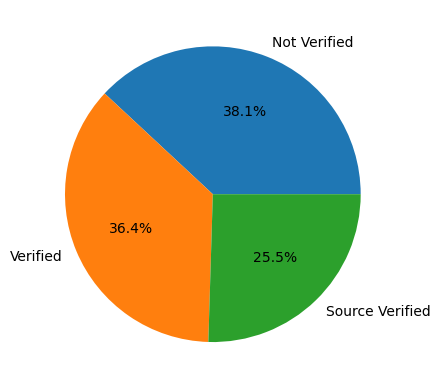

In [105]:
defaulted_loan["verification_status"].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.show()

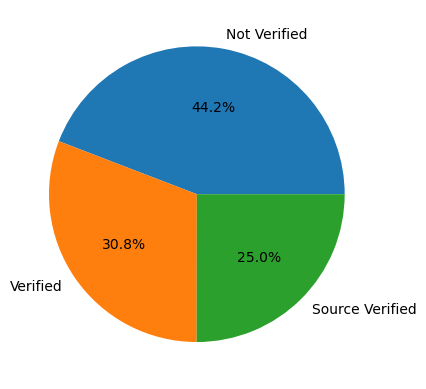

In [106]:
paid_loan["verification_status"].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.show()

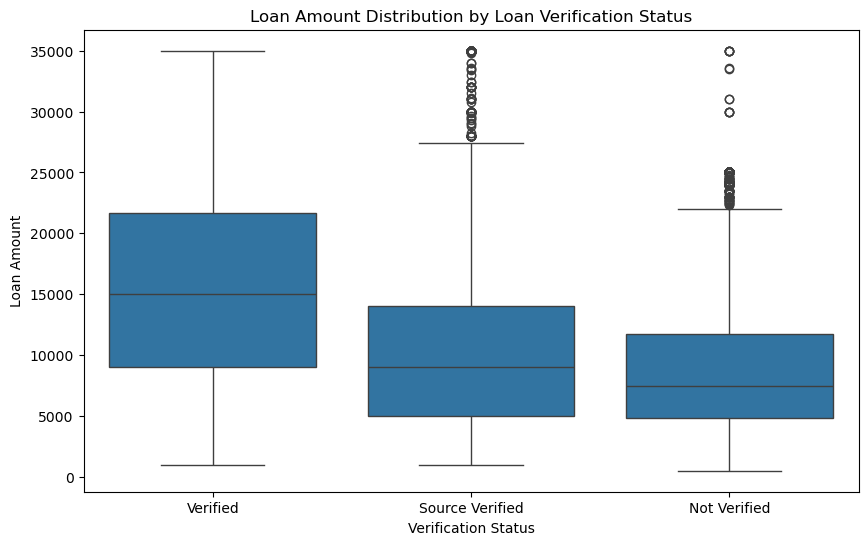

In [107]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan, x='verification_status', y='loan_amnt')
plt.xlabel('Verification Status')
plt.ylabel('Loan Amount')
plt.title('Loan Amount Distribution by Loan Verification Status')
plt.show()

## Observations:
##### Across the Data sets, the customers with Verified and Source Verified have higher default rates compared to Not Verified
- Non Verified users contribute 38% in Defaulteed Loans, compared to 44% in Paid off Loans
- Verified users contribute 36% in Defaulteed Loans, compared to 30% in Paid off Loans (6 % higher defaults)
- Source Verified users contribute 25% in Defaulteed Loans, compared to 25% in Paid off Loans (No improvement across the segments)
- Verified and Source verified users have higher values of loan amount sanctioned compared to unverified


## Default rate across Loan Purpose 

Default Rates by Loan Purpose:
purpose
small_business        25.984683
renewable_energy      18.446602
educational           17.230769
other                 15.852742
moving                15.780446
house                 15.485564
medical               15.295815
debt_consolidation    14.843624
vacation              13.910761
home_improvement      11.659946
credit_card           10.565302
car                   10.329245
major_purchase        10.150892
wedding               10.137276
Name: loan_status, dtype: float64


Text(0.5, 0, 'Loan Purpose')

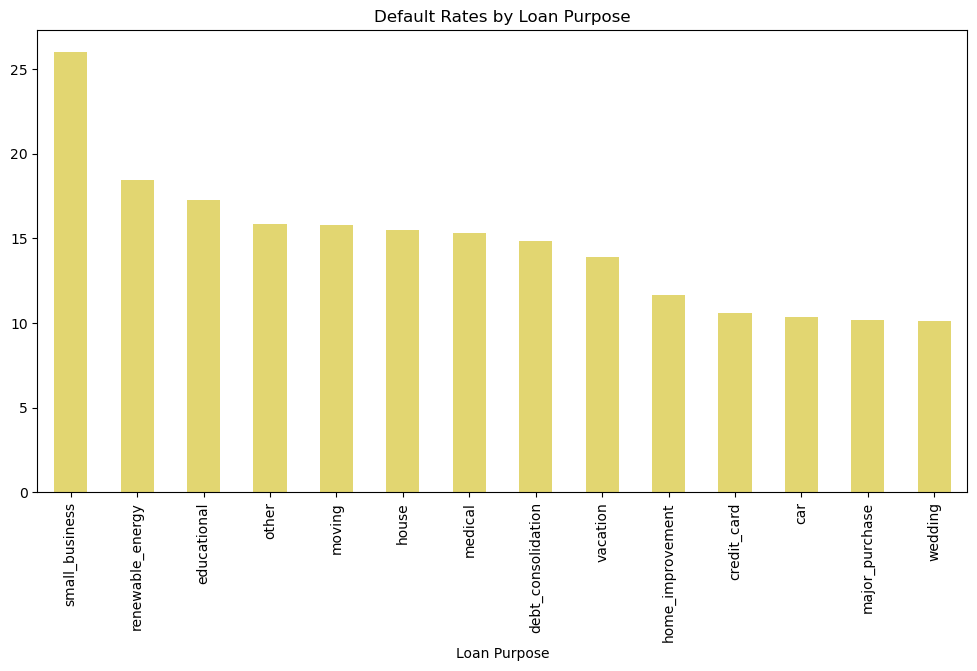

In [108]:
# Calculate default rates by loan purpose
purpose_default_rates =loan.groupby('purpose')['loan_status'].apply(
    lambda x: (x == 'Charged Off').mean() * 100
).sort_values(ascending=False)

# Display default rates for all purposes
print("Default Rates by Loan Purpose:")
print(purpose_default_rates)

# Plot default rates by purpose
plt.figure(figsize=(12, 6))
purpose_default_rates.plot(kind='bar', color='#E2D671')
plt.title('Default Rates by Loan Purpose')
plt.xlabel('Loan Purpose')

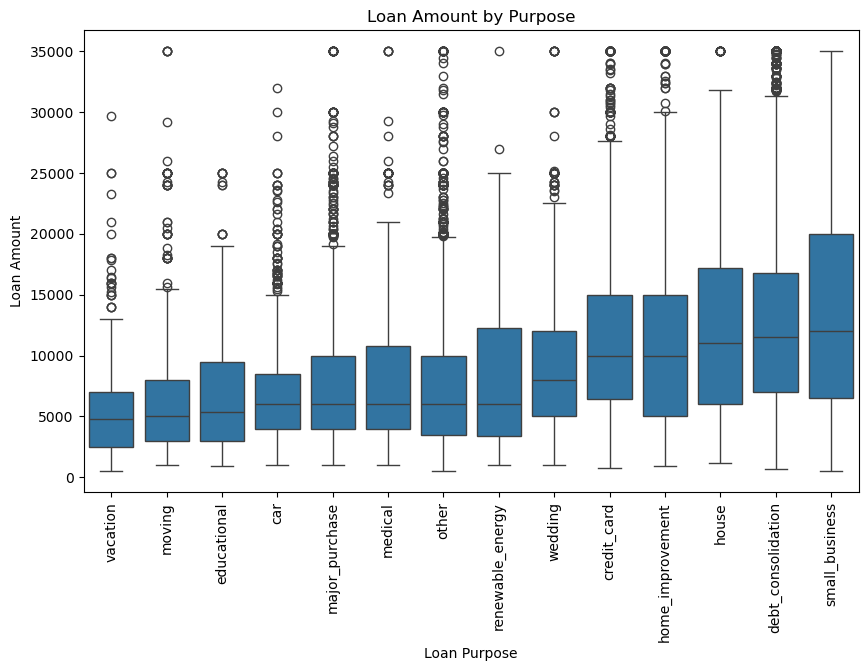

In [109]:
plt.figure(figsize=(10, 6))
temp_order = loan.groupby('purpose')['loan_amnt'].median().sort_values().index
sns.boxplot(data=loan, x='purpose', y='loan_amnt', order =temp_order)
plt.xlabel('Loan Purpose')
plt.ylabel('Loan Amount')
plt.xticks(rotation=90)
plt.title('Loan Amount by Purpose')
plt.show()

## Observations:
##### The following loan purposes have been identified as most riskiest with high default rates:
    - Small Business Loans
    - Renewable Energy installations
    - Educational Loans
##### The following loan purposes have significantly higher loan tickets:
    - Small Business Loans
    - Debt Consolidation
    - House Purchase 
##### The purposes which can be categories as luxuries have relatively lower default rates and smaller ticket sizes
    - Vacation
    - car
    - major purchaces


## Geographical Analysis 
##### Checking if any state has significant default rates

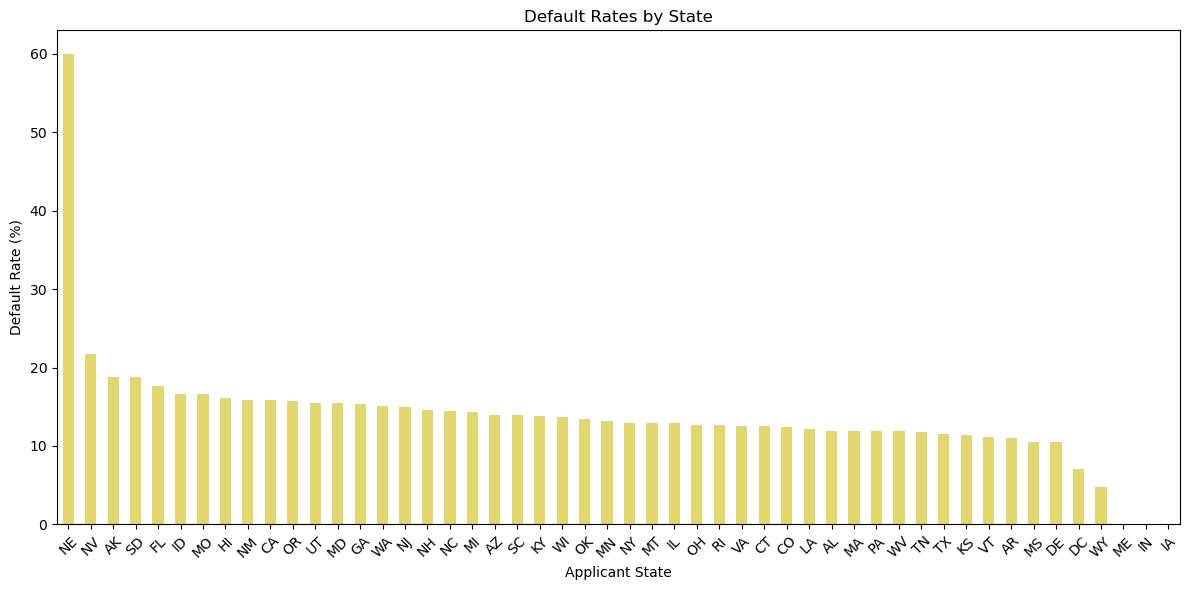

In [110]:

# Calculate default rates by state
state_defaults = loan.groupby('addr_state')['loan_status'].apply(
    lambda x: (x == 'Charged Off').mean() * 100
)

# Sort the default rates in descending order
state_defaults = state_defaults.sort_values(ascending=False)

# Plot the bar chart
state_defaults.plot(
    kind='bar', 
    figsize=(12, 6), 
    title='Default Rates by State', 
    color="#E2D671"
)
plt.xlabel("Applicant State")
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


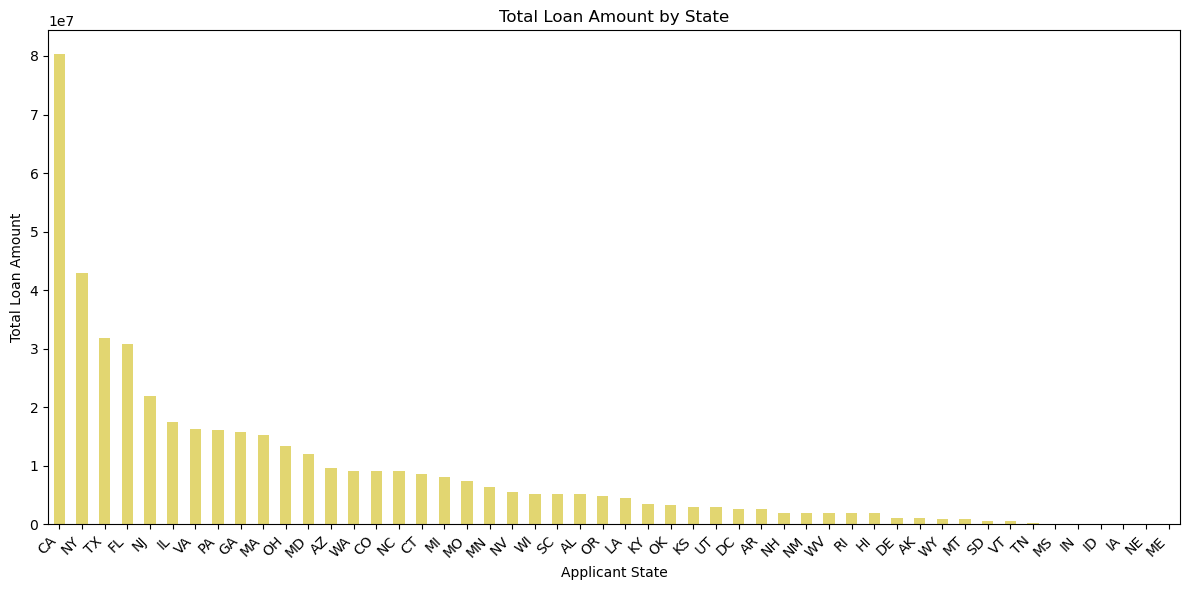

In [111]:
# Calculate the sum of loans by state
state_loan_sum = loan.groupby('addr_state')['loan_amnt'].sum()

# Sort the values in descending order
state_loan_sum = state_loan_sum.sort_values(ascending=False)

# Plot the bar chart
state_loan_sum.plot(
    kind='bar', 
    figsize=(12, 6), 
    title='Total Loan Amount by State', 
    color="#E2D671"
)
plt.xlabel("Applicant State")
plt.ylabel('Total Loan Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Sate NE(Nebraska) has an alarmingly high rate of deafults at 60%
- NE has almost three times higher default rate compared t0 state NV (Nevada) with next highest deafult rate
- States like DC (Distict of Columbia), WY(Wyoming), ME(Mennisotta), IN(Indiana), IA(Iowa) have significatly less default rates compared to rest of the country
- However, the majory of the loan portfolio is not from these extreme states
- The loan portfolio is concentrated in states of CA(California), NY(New York), TX(Texas), FL(Florida)
- FL and CA are on higher side of dealut rates of more than 15% - which calls for more stringent risk assessment of applicants in this region
- TX and NY are on relatively moderate default lates, would still need a stricter evalutation of risk assessment of applicant due to concentration risk of portfolio

In [112]:
#Renaming column for easy recall of the duration of employmnet of the credit users
loan.rename(columns={'emp_length':'emp_duration'},inplace = True)
#Creating a new data frame with no null values in employment duration
loan_dur = loan[~loan['emp_duration'].isnull()]

In [113]:
# Cleaning 'emp_duration' column to retain retain only numberic values 

def clean_emp_length(value):
    if pd.isnull(value) or value.lower() == 'n/a':
        return None
    if '< 1' in value:
        return 0      #All employment durations less than a year are being representedd as 0 
    if '10+' in value:
        return 10     #All employment durations more than 10 years are being representedd as 10
    return int(''.join(filter(str.isdigit, value)))
                    #Rest of the numbers will be represnted as the respective numbers between [1 and 9]
loan_dur['emp_dur_years'] = loan_dur['emp_duration'].apply(clean_emp_length)

C:\Users\gowth\AppData\Local\Temp\ipykernel_10692\1595624240.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dur['emp_dur_years'] = loan_dur['emp_duration'].apply(clean_emp_length)


In [114]:
#Creating a pivot of grade of loan and employment duration , to undersatnad average loan provided across

ld= pd.pivot_table(data= loan_dur, 
               index ='emp_dur_years', 
               columns='grade',
               values='loan_amnt',
               aggfunc='mean'
                  )

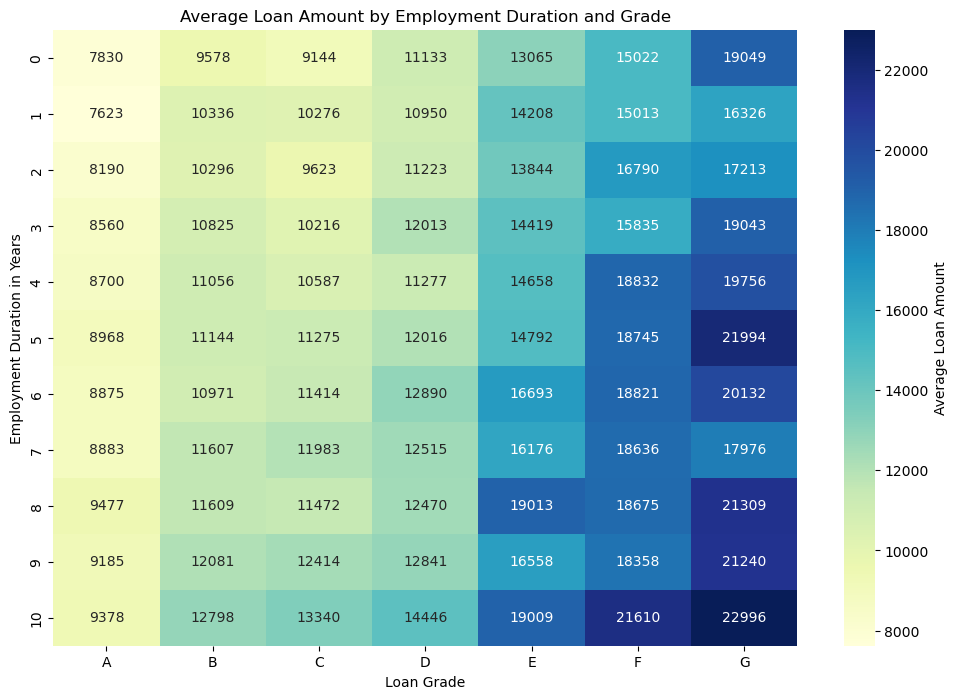

In [115]:
#Ploting a heat map of average loan mount by duration of employment across loan grades

plt.figure(figsize=(12, 8))
sns.heatmap(ld, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Average Loan Amount'})
plt.title('Average Loan Amount by Employment Duration and Grade')
plt.xlabel('Loan Grade')
plt.yticks(rotation=90, ha = 'right')
plt.ylabel('Employment Duration in Years')
plt.show()

## Obserrvation:
- The average loan amount is increasing with higher risk categories
- The average loan amount is also increasing with higher duration of employment
- The average loan ticket size is concerning given the high risk of the loans

#### As the loan average size is higher on the riskier categories, exploring the percentage of overall portfolio in this category

In [116]:
# Creating a pivot with total portfolio of loan across employment duration of users and loan grade
ldsum= pd.pivot_table(data= loan_dur, 
               index ='emp_dur_years', 
               columns='grade',
               values='loan_amnt',
               aggfunc='sum'
              )

In [117]:
# Calculate the grand total
grand_total = ldsum.values.sum()

# Express each value in the pivot table as a percentage of the grand total
ldsum_percentage = (ldsum / grand_total) * 100

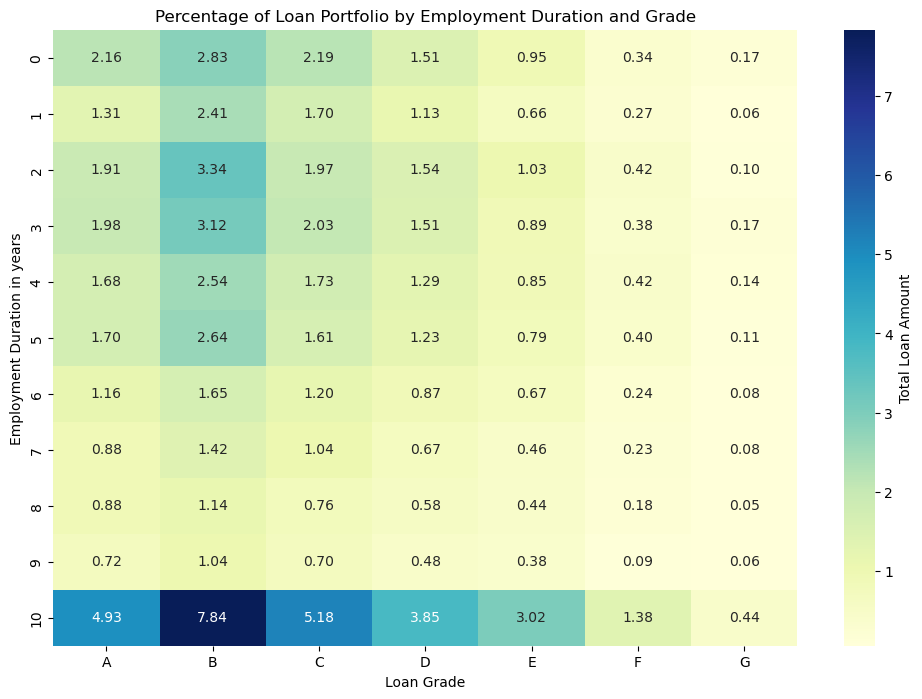

In [118]:
#Ploting aheat map of percentage of poltfolio across Loan grade and Employment duration of users

plt.figure(figsize=(12, 8))
sns.heatmap(ldsum_percentage, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Total Loan Amount'})
plt.title('Percentage of Loan Portfolio by Employment Duration and Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Employment Duration in years')
plt.show()

### Observations: 
 - Despite the higher risk categories having high ticket loans, the cumilative percentage of portfolio in less
 - Across all employmnet duration the portfolio peak is in grade B
 - The employees with more than 10 years of employment duration have a significantly higher proportion of the overall portfolio
 - On Further inspection of portfolio spread for fully paid loans and deafulted loans:
     - Grades A and B had higher concentration of fully paid loans
     - Grades A,B,C,D had higher concentration and relatively comparable distriution of defaulted loans


 - Loans in A,B,C,D have lower ticket size and higher concentration of default rate as a percentage of over all portfolio
 - Is the behaviour true for default rates of individual grades : it has been explored in the plot below

In [119]:
ld_paid=pd.pivot_table(data= loan_dur[loan_dur['loan_status']=='Fully Paid'], 
               index ='emp_dur_years', 
               columns='grade',
               values='id',
               aggfunc='count'
              )

grand_total = ld_paid.values.sum()

ld_paid_percentage = (ld_paid / grand_total) * 100
# Express each value in the pivot table as a percentage of the grand total

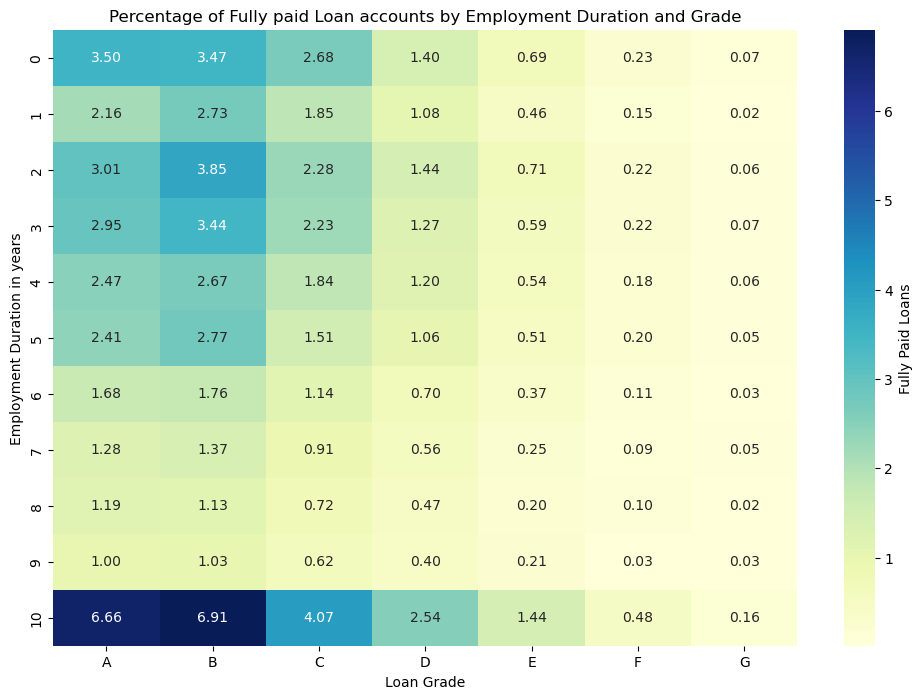

In [120]:
plt.figure(figsize=(12, 8))
sns.heatmap(ld_paid_percentage, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Fully Paid Loans'})
plt.title('Percentage of Fully paid Loan accounts by Employment Duration and Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Employment Duration in years')
plt.show()

In [121]:
ld_off=pd.pivot_table(data= loan_dur[loan_dur['loan_status']=='Charged Off'], 
               index ='emp_dur_years', 
               columns='grade',
               values='id',
               aggfunc='count'
              )

grand_total = ld_off.values.sum()

ld_off_percentage = (ld_off / grand_total) * 100
# Express each value in the pivot table as a percentage of the grand total

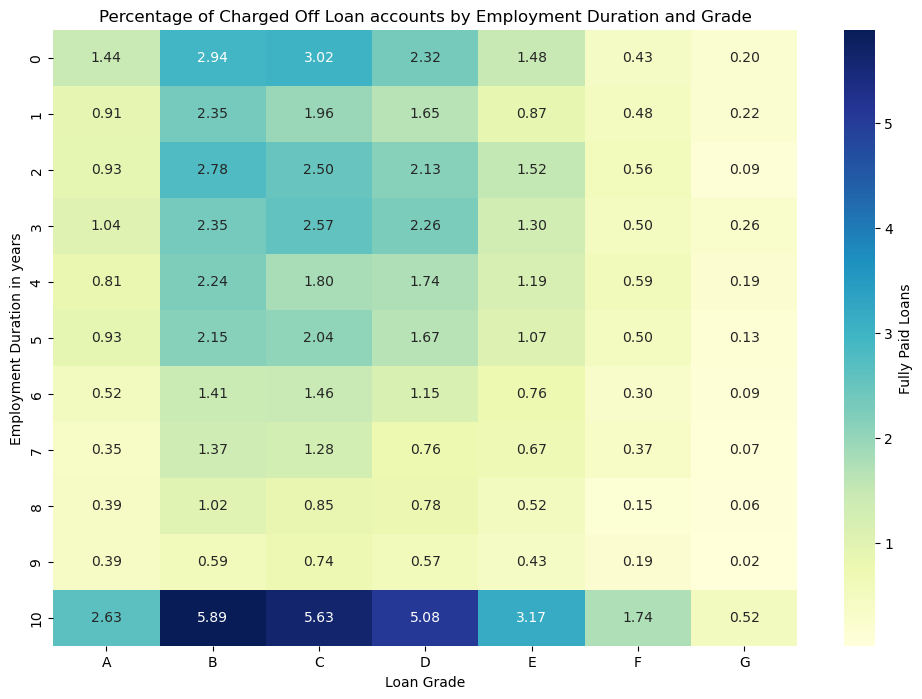

In [122]:
plt.figure(figsize=(12, 8))
sns.heatmap(ld_off_percentage, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Fully Paid Loans'})
plt.title('Percentage of Charged Off Loan accounts by Employment Duration and Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Employment Duration in years')
plt.show()

### Plotting Deafult rates across subgrades

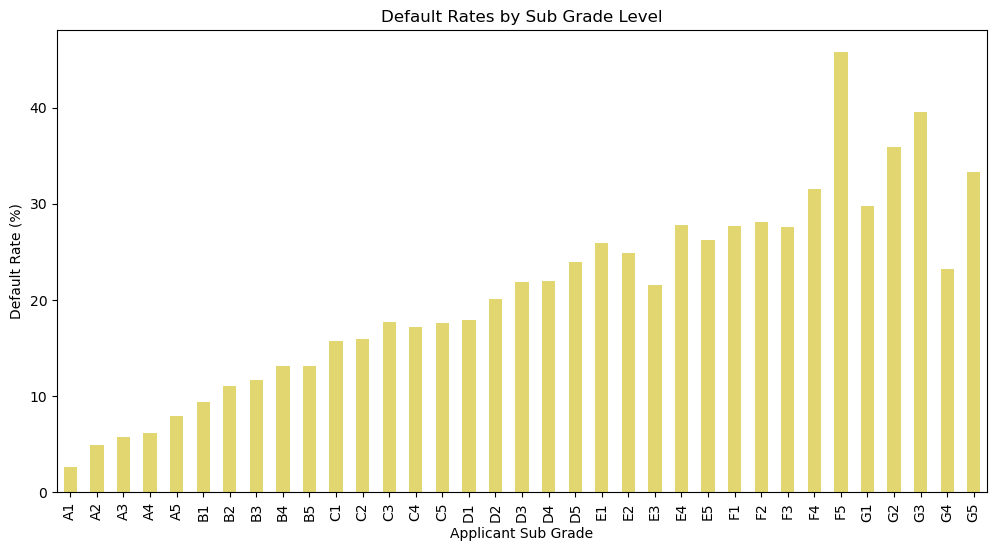

In [123]:

grade_defaults = loan.groupby('sub_grade')['loan_status'].apply(
    lambda x: (x == 'Charged Off').mean() * 100)
#Grouping Loan Status by Sub grades of loan for all defaulted loans

grade_defaults.plot(kind='bar', figsize=(12, 6), title='Default Rates by Sub Grade Level',color="#E2D671")
# Plot default rates by Sub Grade

plt.xlabel("Applicant Sub Grade")
plt.ylabel('Default Rate (%)')
plt.show()

## Observation: 
 - Despite the concentration of amount being higher in the grades A, B,C at a potfolio level,
 - The respective portfolio default rates follow a ascending pattern across (grades) sub grades increasing from A to G
 - There is sudder spike in default rates of loan sub grade F5 compared to any of the sub grades in G grade
 - This requires a deeper inspection at grade and sub grade classifications at riskier categories 

##### Converting Date and Time columns into requiredd format and creating additional columns of year, month and date for further analysis

In [124]:
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format = '%b-%y', errors ='coerce')

In [125]:
loan['issue_year'] = loan['issue_d'].dt.year
loan['issue_month'] = loan['issue_d'].dt.month
loan['issue_date'] = loan['issue_d'].dt.date

In [126]:
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'], format = '%b-%y', errors = 'coerce', yearfirst= True)

#Because earliest %y format is used with years before 1970, it defaults to the 21st century (e.g., 1965 becomes 2065)

loan['earliest_cr_line'] = loan.apply(
    lambda row: row['earliest_cr_line'] - pd.DateOffset(years=100) 
    if row['earliest_cr_line'] and row['earliest_cr_line'].year > row['issue_d'].year 
    else row['earliest_cr_line'], 
    axis=1
)

In [127]:
loan['earliest_cr_year'] = loan['earliest_cr_line'].dt.year
loan['earliest_cr_month'] = loan['earliest_cr_line'].dt.month
loan['earliest_cr_date'] = loan['earliest_cr_line'].dt.date

### Line Plot of New customers onbaorded over time

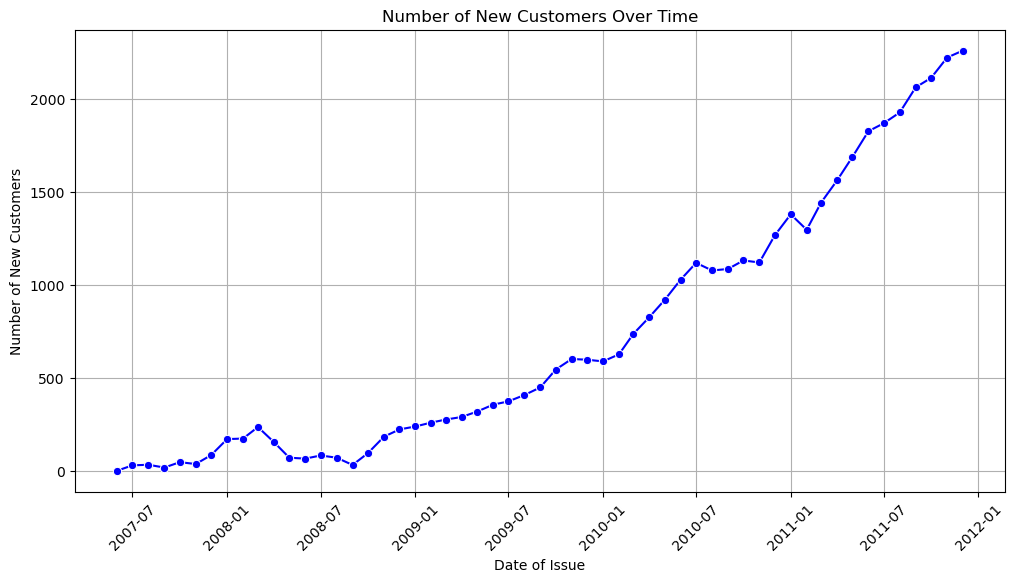

In [128]:

plt.figure(figsize=(12, 6))
new_customers = loan.groupby('issue_d')['id'].count().reset_index()
sns.lineplot(data=new_customers, x='issue_d', y='id', marker='o', color='blue')
plt.xlabel('Date of Issue')
plt.ylabel('Number of New Customers')
plt.title('Number of New Customers Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Line Plot of Total credit disbursed as loans over time

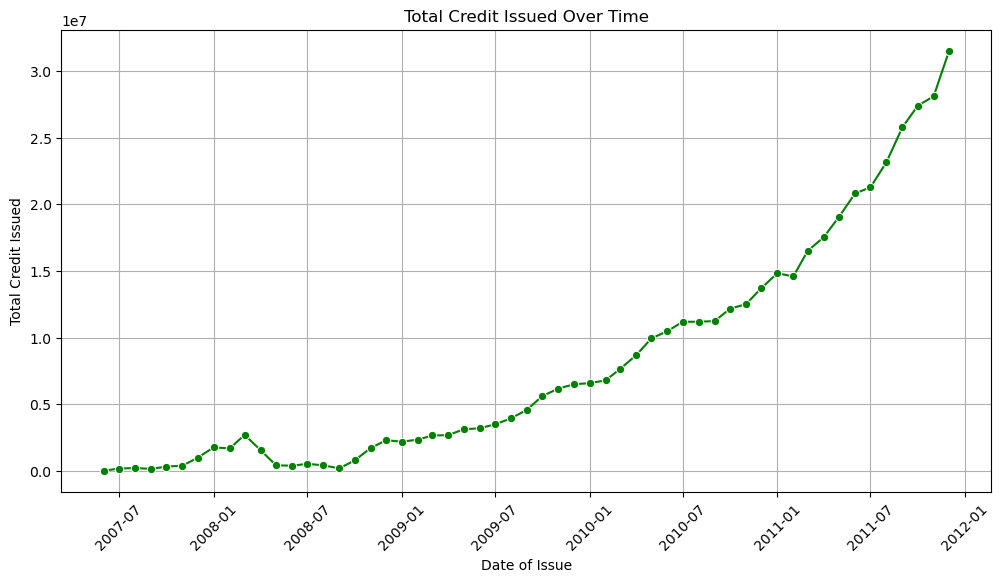

In [129]:
plt.figure(figsize=(12, 6))
total_credit = loan.groupby('issue_d')['loan_amnt'].sum().reset_index()
sns.lineplot(data=total_credit, x='issue_d', y='loan_amnt', marker='o', color='green')
plt.xlabel('Date of Issue')
plt.ylabel('Total Credit Issued')
plt.title('Total Credit Issued Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Line Plot of average credit value of credit lines sanctioned over time

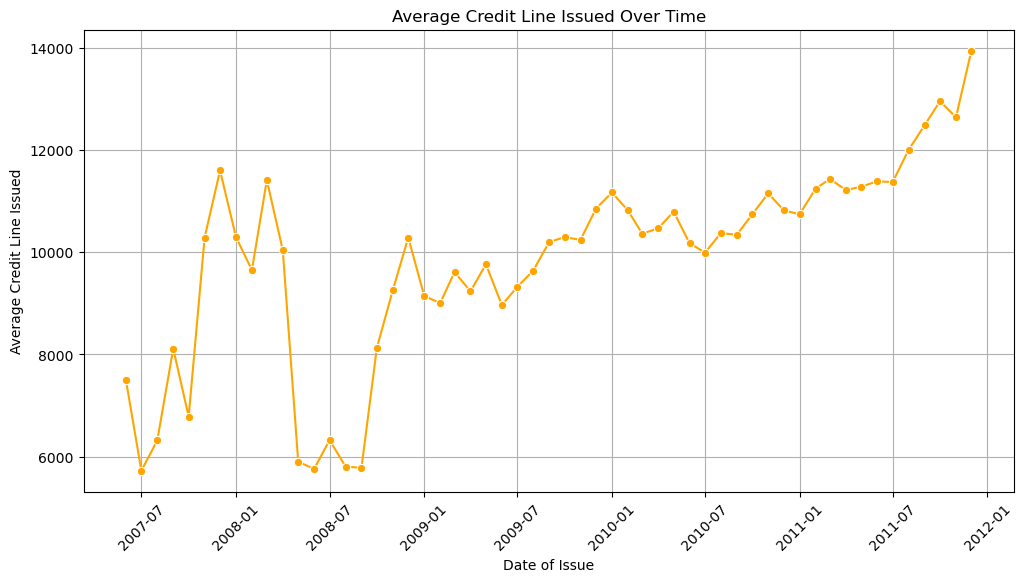

In [130]:
plt.figure(figsize=(12, 6))
avg_credit = loan.groupby('issue_d')['loan_amnt'].mean().reset_index()
sns.lineplot(data=avg_credit, x='issue_d', y='loan_amnt', marker='o', color='orange')
plt.xlabel('Date of Issue')
plt.ylabel('Average Credit Line Issued')
plt.title('Average Credit Line Issued Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Observations: 
 - There is a significant increase in average credit amount issue before 2008 and beginning of 2008
 - The sudden drop of new customers, quantum of new credit lines and average credit lines during this period

In [131]:
#creating new cohorts based on the date of issue of the loans to see if there is any diffence in behaviour of these users
cohort_1 = loan[(loan['issue_d'] >= '2007-10-01') & (loan['issue_d'] <= '2008-04-30')] 
# Pre 20008 Financial crisis - Cohort
cohort_2 = loan[(loan['issue_d'] >= '2008-05-01') & (loan['issue_d'] <= '2008-09-30')]
# 20008 Financial Crisis Cohort

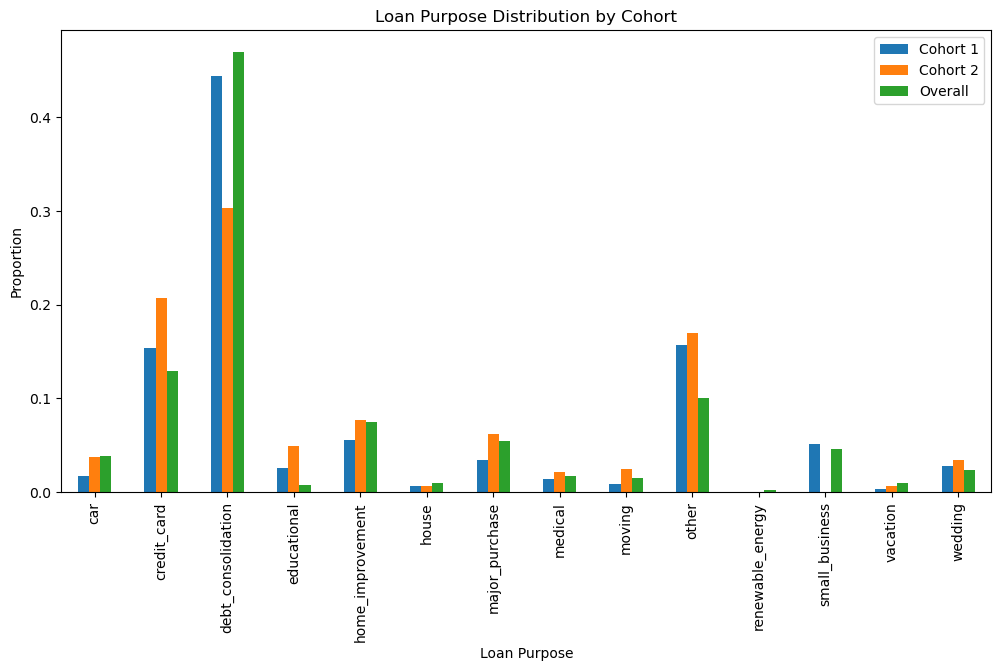

In [132]:
# Creating data frames with value couts of purpose of the cohorts
cohort_1_purpose = cohort_1['purpose'].value_counts(normalize=True)
cohort_2_purpose = cohort_2['purpose'].value_counts(normalize=True)
overall_purpose = loan['purpose'].value_counts(normalize=True)

purpose_df = pd.DataFrame({
    'Cohort 1': cohort_1_purpose, #Pre '08 Crisis
    'Cohort 2': cohort_2_purpose, #During '08 Crisis
    'Overall': overall_purpose    #Overall Portfolio
}).fillna(0)

#ploting a bar graph of the purpose of loans of over all portfolio and the respective cohorts identified

purpose_df.plot(kind='bar', figsize=(12, 6))
plt.title('Loan Purpose Distribution by Cohort')
plt.xlabel('Loan Purpose')
plt.ylabel('Proportion')
plt.show()

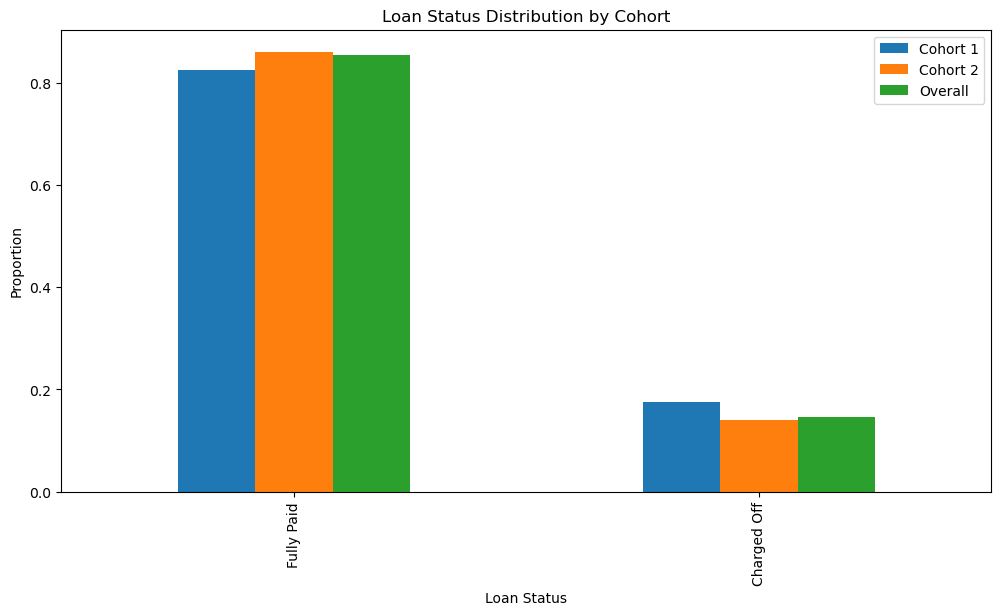

In [133]:
# Filtering the cohorts to have only Fully paid and Charged Off Loan Status

filtered_cohort_1 = cohort_1[cohort_1['loan_status'] != 'Current']
filtered_cohort_2 = cohort_2[cohort_2['loan_status'] != 'Current']
filtered_overall = loan[loan['loan_status'] != 'Current']

# Value Counts of the Loan Status of filteredd cohorts, normalised to get proprtion of the cohorts

cohort_1_loan_status = filtered_cohort_1['loan_status'].value_counts(normalize=True)
cohort_2_loan_status = filtered_cohort_2['loan_status'].value_counts(normalize=True)
overall_loan_status = filtered_overall['loan_status'].value_counts(normalize=True)

purpose_df = pd.DataFrame({
    'Cohort 1': cohort_1_loan_status,
    'Cohort 2': cohort_2_loan_status,
    'Overall': overall_loan_status
}).fillna(0)

# Ploting a bar graph of Value counts
purpose_df.plot(kind='bar', figsize=(12, 6))
plt.title('Loan Status Distribution by Cohort')
plt.xlabel('Loan Status')
plt.ylabel('Proportion')
plt.show()

## Observations: 
- Highest porportion of loan applications Per 2008 Crisis is going to Debt Consolidation, payment of credit cards
- During the crisis Debt consolidation and Credit card payment continued to have more proportion of loans sanctioned
- Applicants who got loan during the 2008 Financial Crisis, are better off in paying the loan and have lesser proportion of loans charged off compared to Per 2008 applicants and overall portfolio

## Impact of Interest rate on Default

C:\Users\gowth\AppData\Local\Temp\ipykernel_10692\3256953459.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  int_rate_default_rates = loan.groupby('int_rate_bin')['loan_status'].apply(lambda x: (x == 'Charged Off').mean() * 100).sort_index()


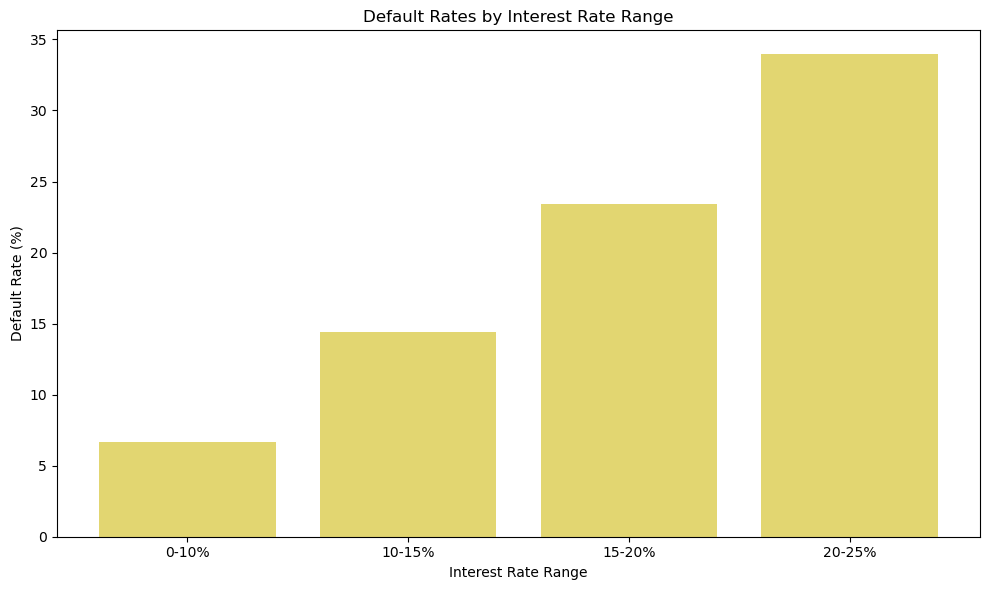

In [134]:
# Creating bins of interest rate for easier study of the default rates

int_rate_bins = pd.cut(
        loan['int_rate'], 
        bins=[0, 10, 15, 20, 25, 30], 
        labels=['0-10%', '10-15%', '15-20%', '20-25%', '25-30%']
    )

# Add bins to the dataset
loan['int_rate_bin'] = int_rate_bins

# Calculate default rate for each interest rate bin
int_rate_default_rates = loan.groupby('int_rate_bin')['loan_status'].apply(lambda x: (x == 'Charged Off').mean() * 100).sort_index()

# Plot default rates by interest rate bin
plt.figure(figsize=(10, 6))
plt.bar(int_rate_default_rates.index.astype(str), int_rate_default_rates.values, color='#E2D671')

# Add titles and labels
plt.title('Default Rates by Interest Rate Range')
plt.xlabel('Interest Rate Range')
plt.ylabel('Default Rate (%)')
plt.tight_layout()
plt.show()

## Observation:
 - Higher interest rates have higher default rate which is an expected behaviour as riskier loans tend to have higher interest rates

## Impact of Term of Loan on Default rate

In [135]:
# Extracting the numeric value of Loan term into a column colled term_cleaned
loan['term_cleaned'] = loan['term'].str.extract('(\\d+)').astype(int)

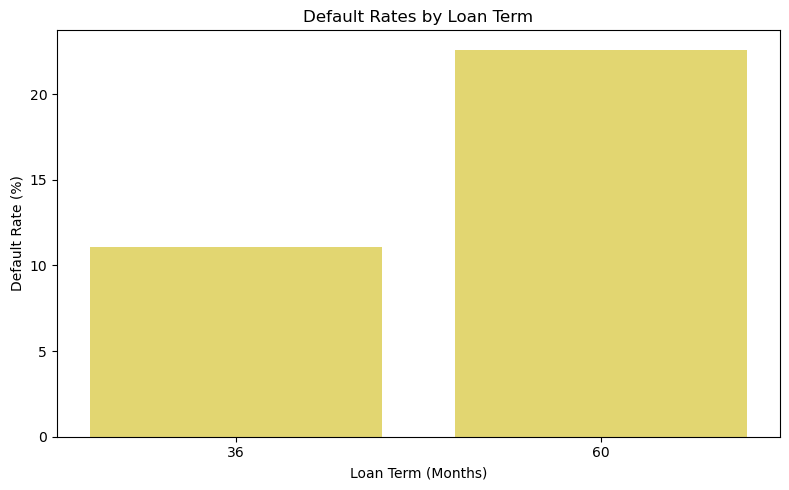

In [136]:
# Calculate default rates by term
term_default_rates = loan.groupby('term_cleaned')['loan_status'].apply(lambda x: (x == 'Charged Off').mean() * 100).sort_index()

# Plot default rates by term
plt.figure(figsize=(8, 5))
plt.bar(term_default_rates.index.astype(str), term_default_rates.values, color='#E2D671')

# Add titles and labels
plt.title('Default Rates by Loan Term')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Observation: 
#### Higher Term loans have higher default rates, almost doubling the default rates

## Impact of Loan Amount on Default rates

C:\Users\gowth\AppData\Local\Temp\ipykernel_10692\2594085103.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_amnt_default_rates = loan.groupby('loan_amnt_bin')['loan_status'].apply(


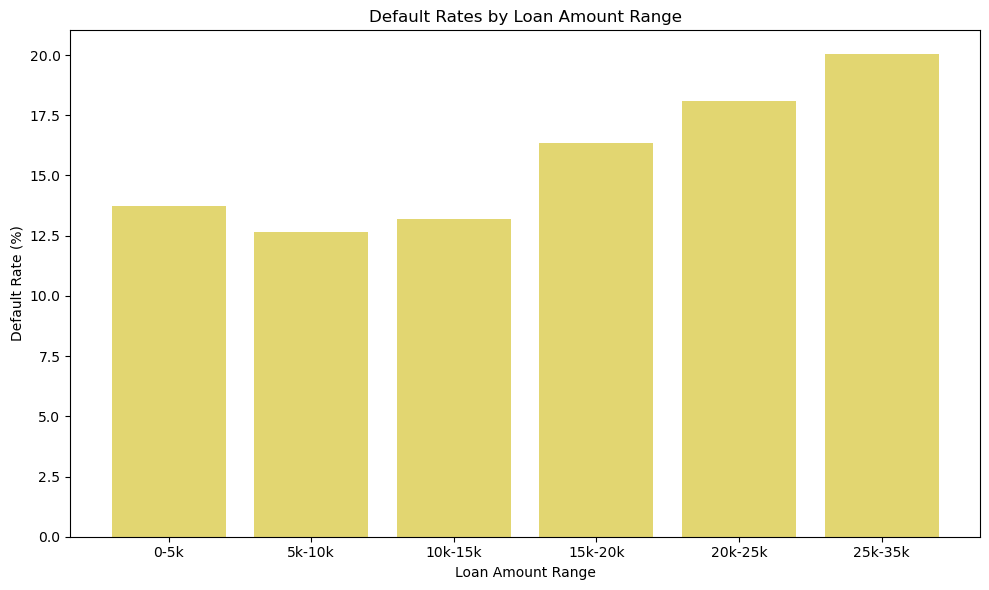

In [137]:
# Create loan amount bins
loan_amnt_bins = pd.cut(
    loan['loan_amnt'], 
    bins=[0, 5000, 10000, 15000, 20000, 25000, 35000], 
    labels=['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-35k']
)

# Add bins to the dataset
loan['loan_amnt_bin'] = loan_amnt_bins

# Calculate default rate for each loan amount bin
loan_amnt_default_rates = loan.groupby('loan_amnt_bin')['loan_status'].apply(
    lambda x: (x == 'Charged Off').mean() * 100
).sort_index()

# Plot default rates by loan amount bin
plt.figure(figsize=(10, 6))
plt.bar(loan_amnt_default_rates.index.astype(str), loan_amnt_default_rates.values, color='#E2D671')

# Add titles and labels
plt.title('Default Rates by Loan Amount Range')
plt.xlabel('Loan Amount Range')
plt.ylabel('Default Rate (%)')
plt.tight_layout()
plt.show()

## Observations: 
#### The loan with ticket size [5K - 10K) and [10K-15K) have least default rate 
#### Higher ticket size loans have the highest default rates
    - Defaault of high ticket loans puts significant stress on overall portfolio and increasing interest rates for future borrowers
    - A thorough scrutinity of high ticket loans in advised to reduce default rates

## Credit Age and Imapact of Creidt age on default rates
#### Credit age is the time between the first creidt line issues to the applicant and the loan issued by Lending Club

In [138]:
loan['credit_age_yr'] = loan['issue_year']-loan['earliest_cr_year']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


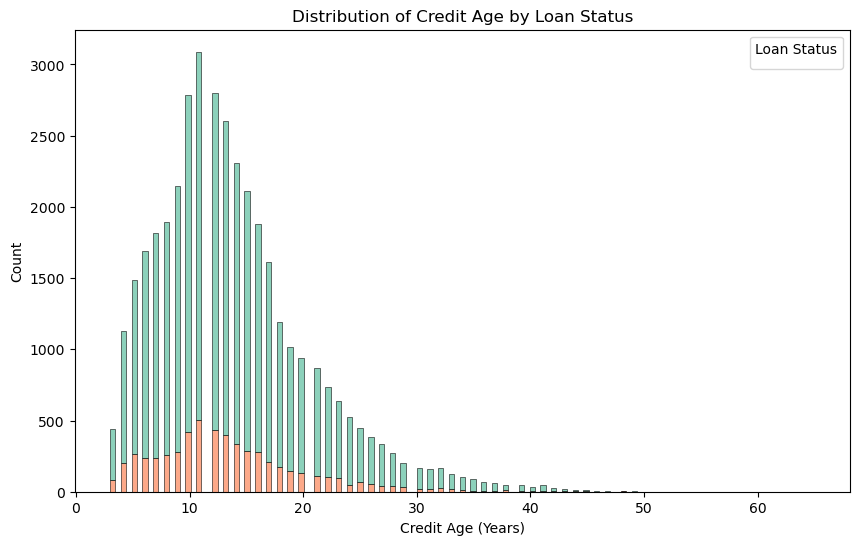

In [139]:
# Plot histogram with loan status differentiation
plt.figure(figsize=(10, 6))
sns.histplot(
    data=loan[loan['loan_status']!='Current'], 
    x='credit_age_yr', 
    hue='loan_status', 
    hue_order=['Fully Paid', 'Charged Off'], 
    multiple='stack',  # Stacks the histograms for each status
    palette='Set2',  
    #bins=30           
)

plt.xlabel('Credit Age (Years)')
plt.ylabel('Count')
plt.title('Distribution of Credit Age by Loan Status')
plt.legend(title='Loan Status')
plt.show()


## Observation: 
#### Credit age seems to have no impact on the default rate
#### The default rate is in proprtion to the fully paid loan accounts for a given credit age

## Impact of Credit enquiries of on Default rate

In [140]:
# Creating a pivot of number of loan enquiries of the applicants in the last 6 months
loan_inq = pd.pivot_table(data = loan[loan['loan_status']!='Current'],
                          values ='id',
                          index= 'loan_status',
                          columns='inq_last_6mths',
                          aggfunc= 'count'
                         )
loan_inq

inq_last_6mths,0,1,2,3,4,5,6,7,8
loan_status,,,,,,,,,
Charged Off,2280,1677,943,619,51,28,16,10,3
Fully Paid,16429,8983,4711,2364,265,116,47,24,11


In [141]:
loan_inq_ratio = loan_inq.loc['Charged Off'] / loan_inq.loc['Fully Paid']
# Calculating the ratio of loans 'Charged Off' to loan 'Fully Paid' across the frequency of credit enquiries

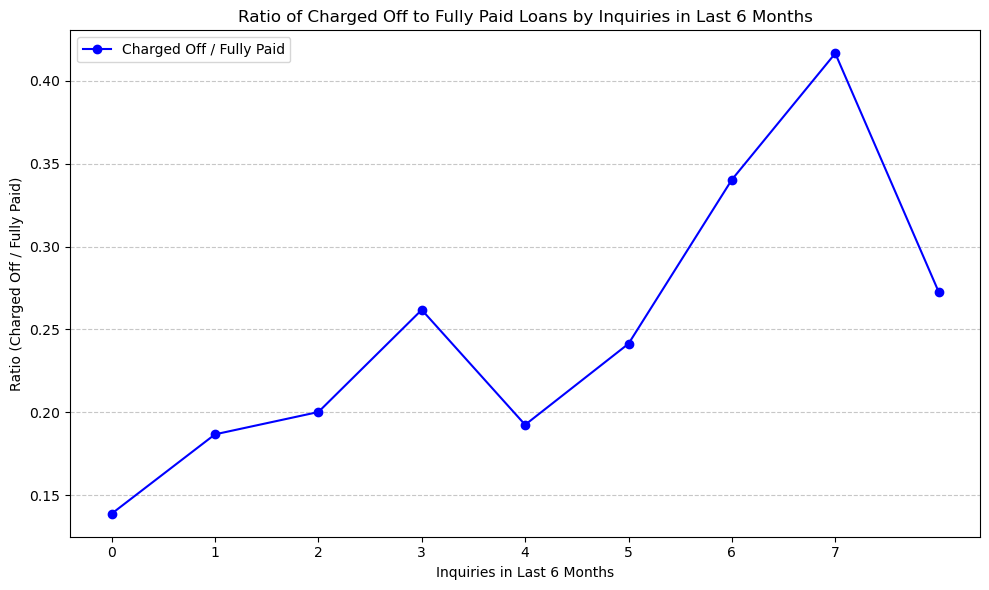

In [142]:
#Plot the line graph for the ratio
plt.figure(figsize=(10, 6))
plt.plot(
    loan_inq_ratio, 
    marker='o', 
    color='blue', 
    label='Charged Off / Fully Paid'
)
plt.title('Ratio of Charged Off to Fully Paid Loans by Inquiries in Last 6 Months')
plt.xlabel('Inquiries in Last 6 Months')
plt.ylabel('Ratio (Charged Off / Fully Paid)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=loan_inq.columns[:-1], labels=loan_inq.columns[:-1])
plt.legend()
plt.tight_layout()
plt.show()



## Observations: 
#### Higher credit inquries, the ratio of Defaulted Accounts to Fully Paid accounts is increasing
- The higher the credit enquiries, the more likely the applicant is to default on the loan


## Impact of Installment on Defaultrate

In [143]:
loan['installment'].describe()

count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64

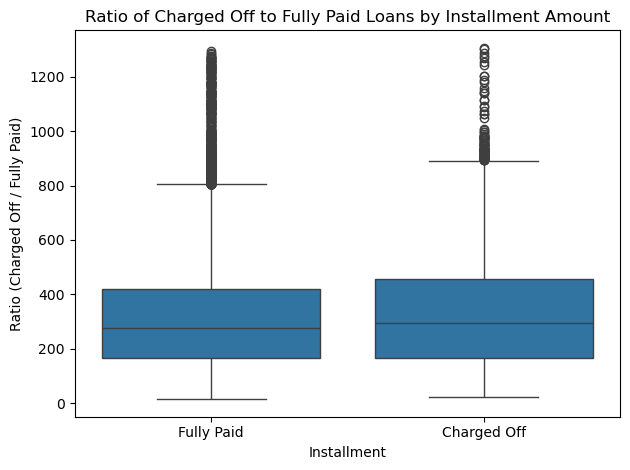

In [144]:
sns.boxplot(data = loan[loan['loan_status']!='Current'],
               x= 'loan_status',
                y='installment'
           )

plt.title('Ratio of Charged Off to Fully Paid Loans by Installment Amount')
plt.xlabel('Installment')
plt.ylabel('Ratio (Charged Off / Fully Paid)')
plt.tight_layout()
plt.show()

#### Istallment dosenot have significant impact across the defaulted loans and fully paid loans
- The spread of the loans, Mean values of the istallment amount are comparable
- There is no significant diffenece in distribution of installment between defaulted loans and fully paid loans

## Impact of Revolving Utilization of Credit limit

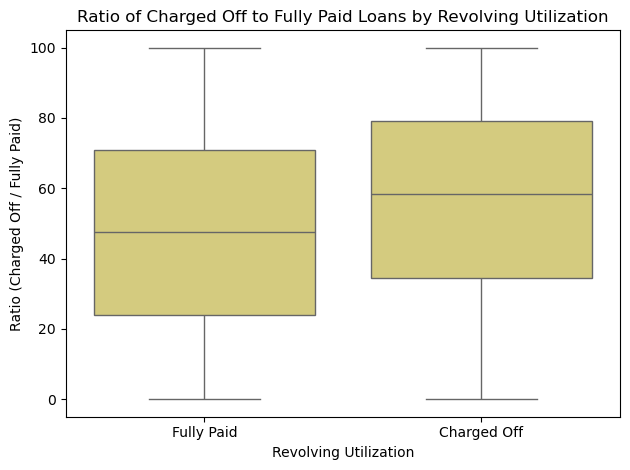

In [145]:
# Ploting a box plot of revolving utilization percentage acrross Loan Status

sns.boxplot(data = loan[loan['loan_status']!='Current'],
               x= 'loan_status',
                y='revol_util',
                color="#E2D671"
           )

plt.title('Ratio of Charged Off to Fully Paid Loans by Revolving Utilization')
plt.xlabel('Revolving Utilization')
plt.ylabel('Ratio (Charged Off / Fully Paid)')
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


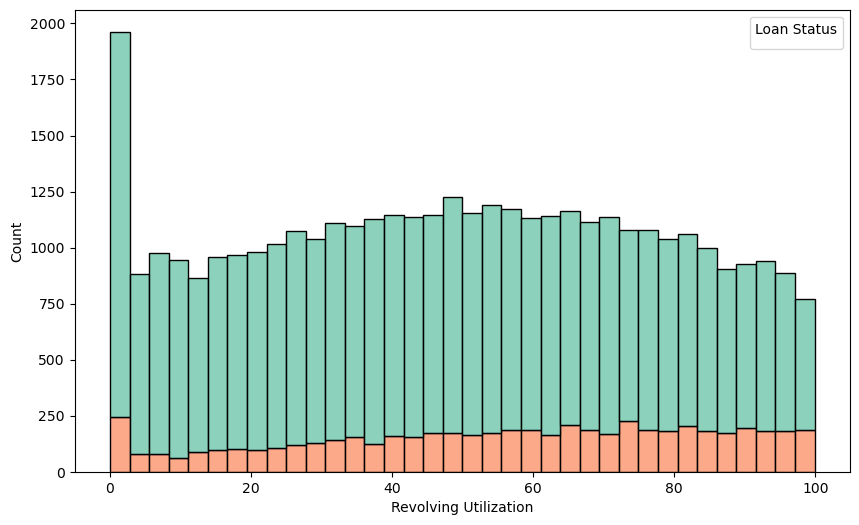

In [146]:
# Plotting a histogram of utilization percentage showing the number of accounts defaulting compared to number of accounts cleard 
plt.figure(figsize=(10, 6))
sns.histplot(
    data=loan[loan['loan_status']!='Current'], 
    x='revol_util', 
    hue='loan_status', 
    hue_order=['Fully Paid', 'Charged Off'], 
    multiple='stack', 
    palette='Set2',    
    #bins=30           
)

plt.xlabel('Revolving Utilization')
plt.ylabel('Count')
#plt.title('Distribution of Credit Age by Loan Status')
plt.legend(title='Loan Status')
plt.show()


## Observations: 
##### The defaulted loan accounts had with higher revolving utilization percentages
##### The Average utilization percentage of defaulted accounts is 60%
##### The Average utilization percentage of cleared loans accounts in 40%
##### The ratio of defaulted accounts to cleared loans is increasing with increase in revolving utilization percentage
##### Higher the revolving utilization of credit limit, the more is the likelily hood of default, suggesting approporiate collection mechanisms to be put in place

## Impact of Pubic records of Bankruptcies of the applicants on loan status

In [147]:
# Filtering current accounts
prb = loan [loan['loan_status']!= 'Current']
# Creating apivot table of public bank ruptcies by loan status showing the number of accounts in each category

prb_pivot = pd.pivot_table (
    data = prb,
    values ='id',
    index ='pub_rec_bankruptcies',
    columns = 'loan_status',
    aggfunc ='count'
)

prb_pivot



loan_status,Charged Off,Fully Paid
pub_rec_bankruptcies,,
0.0,5141,31097
1.0,366,1271
2.0,2,3


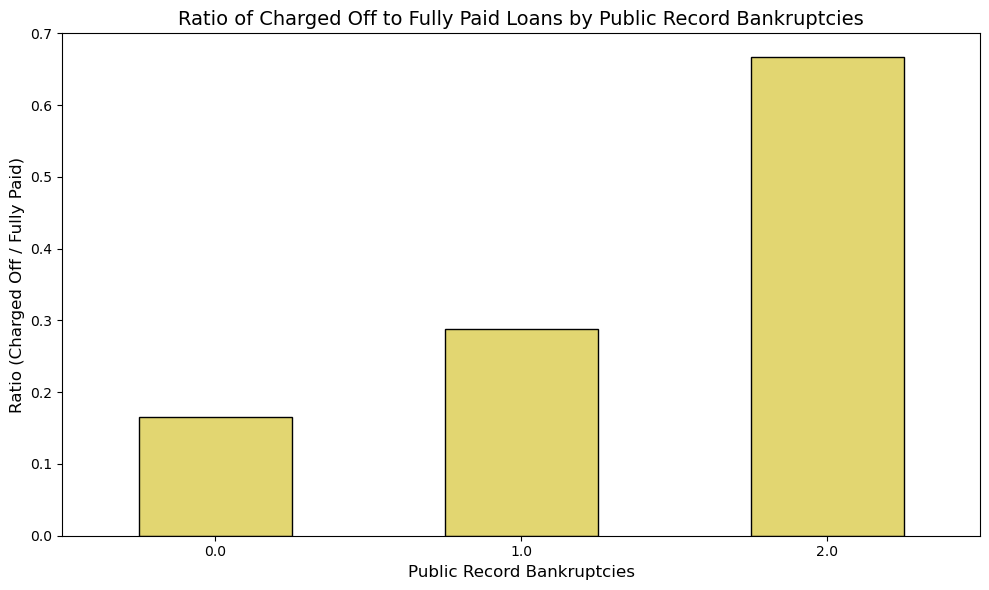

In [148]:
# Creating ratios of for the plot
prb_ratios = prb_pivot['Charged Off'] / prb_pivot['Fully Paid']

# Plot the ratios
plt.figure(figsize=(10, 6))
prb_ratios.plot(kind='bar', color='#E2D671', edgecolor='black')

# Adding titles and labels
plt.title('Ratio of Charged Off to Fully Paid Loans by Public Record Bankruptcies', fontsize=14)
plt.xlabel('Public Record Bankruptcies', fontsize=12)
plt.ylabel('Ratio (Charged Off / Fully Paid)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Show plot
plt.show()


## Observations: 
##### The ratio of Defaulted accounts to Fully Paid accounts is increating with increase in number of Public bankruptice records of applicants
##### The absolute number of applicants with any bankruptcy record is less than 5% of the entire portfolio
##### The users with history of bankruptcy are very likely to default on loans and have to be verified thoroughly

## Impact of Verification Status on Loan Status

In [149]:
# Creating a pivot table of verification status by loan staus showing number of accounts in each category
ver = pd.pivot_table(loan[loan['loan_status']!='Current'],
                    values = 'id',
                    index = 'loan_status',
                    columns = 'verification_status',
                    aggfunc ='count'
                    )
ver

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,2142,1434,2051
Fully Paid,14552,8243,10155


In [150]:
# Calculating ratios of Charged off accounts to Fully Paid accounts

ver_ratio = ver.loc['Charged Off']/ver.loc['Fully Paid']
ver_ratio

verification_status
Not Verified       0.147196
Source Verified    0.173966
Verified           0.201969
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


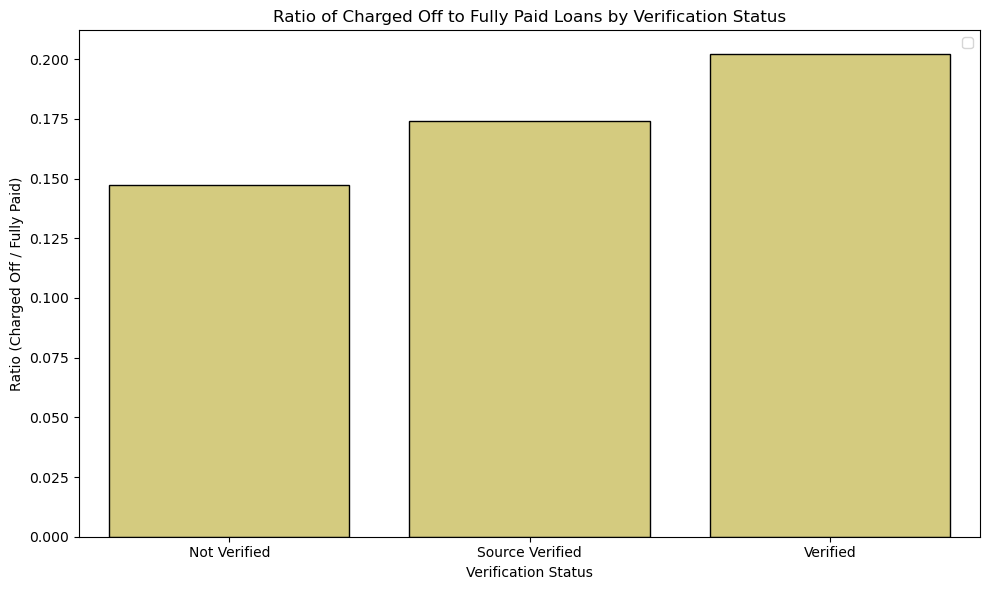

In [151]:
#Ploting the bar plot of ratio of charged off to Fully paid loans by Verification status

plt.figure(figsize=(10, 6))
sns.barplot(ver_ratio, color = '#E2D671', edgecolor ='black')

# Adding titles

plt.title('Ratio of Charged Off to Fully Paid Loans by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Ratio (Charged Off / Fully Paid)')
plt.legend()
plt.tight_layout()

plt.show()

## Observations: 
 ##### The Verified laons and source verified loans have higher  chance of default rate
 ##### This is counter intutive to the verification status of the loans, as it is expected that loans with verified source of income should have better payment behaviour
 ##### This calls for a scrutiny of the verification process

## Impact of Job Title 
##### Indetifyng people with the job titles / employes who are most likely to defalut

In [152]:
loan['emp_title_cleaned'] = loan['emp_title'].str.strip().str.lower()

# Analyze top 10 job titles and default rates
top_titles = (
    loan['emp_title_cleaned']
    .value_counts()
    .head(10)
    .index
)
title_default_rates = loan[loan['emp_title_cleaned'].isin(top_titles)].groupby(
    'emp_title_cleaned')['loan_status'].apply(lambda x: (x == 'Charged Off').mean() * 100)

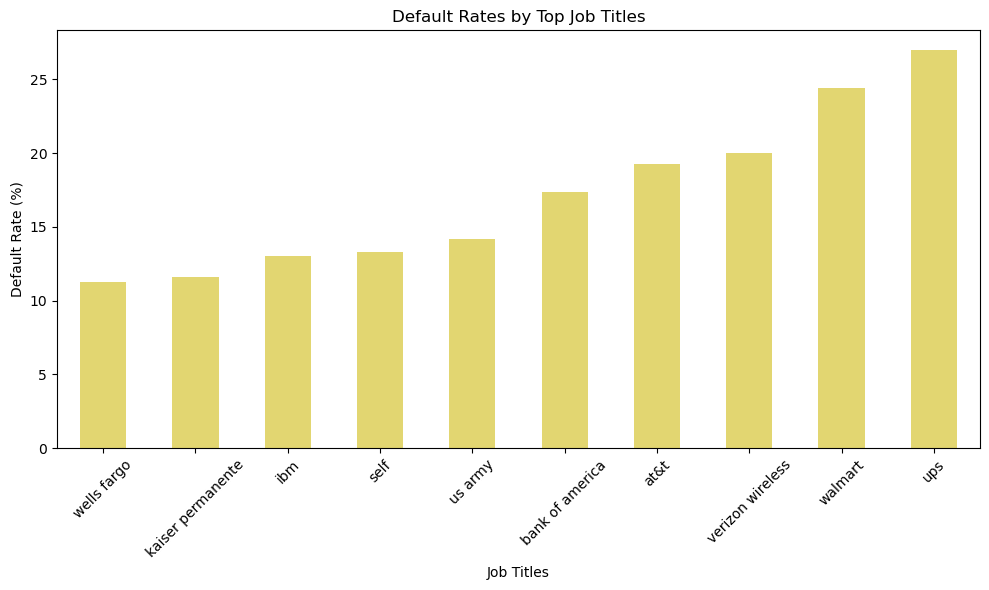

In [153]:
# Ploting a bar plot of top 10 defaulting job titles

plt.figure(figsize=(10, 6))
title_default_rates.sort_values().plot(kind='bar', color='#E2D671')
plt.title('Default Rates by Top Job Titles')
plt.xlabel('Job Titles')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Observations: 
##### Employees working at UPS have the highest default rate, followed by Walmart, Verizon wireless

## Impact of Debt to Income Ratio on Loan default rates

C:\Users\gowth\AppData\Local\Temp\ipykernel_10692\3855710481.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dti_default_rates = loan.groupby('dti_bin')['loan_status'].apply(


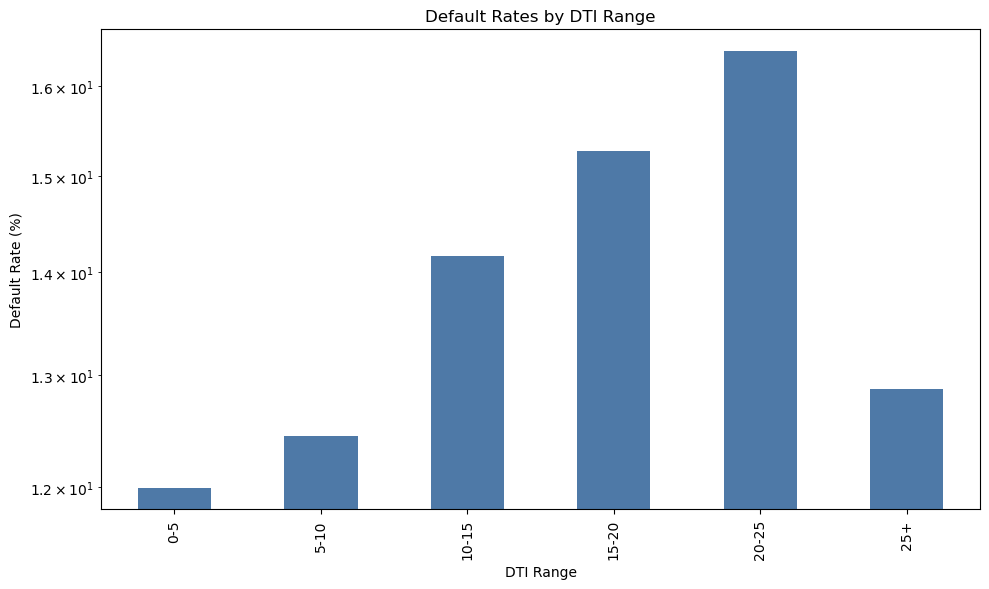

In [154]:
# Create bins for DTI
dti_bins = pd.cut(
    loan['dti'], 
    bins=[0, 5, 10, 15, 20, 25, 30], 
    labels=['0-5', '5-10','10-15', '15-20','20-25', '25+']
)

# Add the bins to the dataset
loan['dti_bin'] = dti_bins

# Calculate default rate for each DTI bin
dti_default_rates = loan.groupby('dti_bin')['loan_status'].apply(
    lambda x: (x == 'Charged Off').mean() * 100
).sort_index()

# Plot default rates by DTI bin
plt.figure(figsize=(10, 6))
dti_default_rates.plot(kind='bar', color='#4E79A7', logy=True)
plt.title('Default Rates by DTI Range')
plt.xlabel('DTI Range')
plt.ylabel('Default Rate (%)')
plt.tight_layout()
plt.show()

## Observations: 
##### Loan applicants with DTI (Debt to Income) in range of 20-25 are most likely to defalut,
##### The higher the DTI ratio, the higher the chance of default
##### The exception is the applicants with DTI higher than 25

            loans_issued  loans_defaulted  default_percentage
issue_year                                                   
2007                 251               45           17.928287
2008                1562              247           15.813060
2009                4716              594           12.595420
2010               11532             1485           12.877211
2011               21656             3256           15.035094


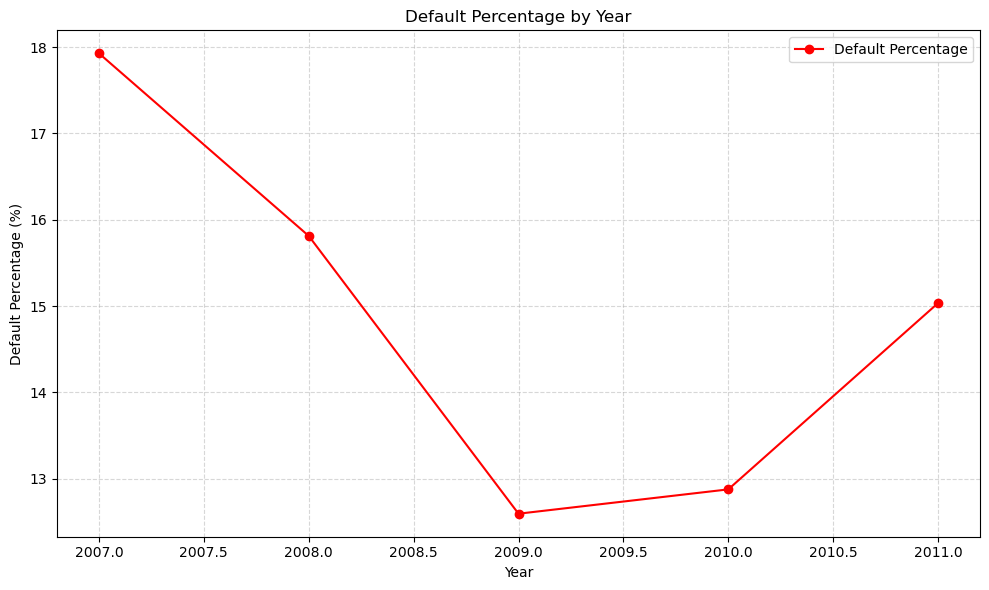

In [155]:
# Step 3: Group by year to calculate loans issued and defaults
yearly_data = loan.groupby('issue_year').agg(
    loans_issued=('loan_status', 'count'),
    loans_defaulted=('loan_status', lambda x: (x == 'Charged Off').sum())
)

# Step 4: Calculate default percentages
yearly_data['default_percentage'] = (yearly_data['loans_defaulted'] / yearly_data['loans_issued']) * 100

# Display the results
print(yearly_data)

# Step 5: Plot default percentage
plt.figure(figsize=(10, 6))
yearly_data['default_percentage'].plot(kind='line', marker='o', color='red', label='Default Percentage')
plt.title('Default Percentage by Year')
plt.xlabel('Year')
plt.ylabel('Default Percentage (%)')   
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

#### Observation
#### 2007 had the highest default rate at 17.93%, likely due to the financial crisis, which caused widespread financial strain and higher loan defaults. 
#### 2007: 17.93% (Highest default rate, likely due to the financial crisis)
#### 2008: 15.81%
#### 2009: 12.60%
#### 2010: 12.88%
#### 2011: 15.04%
